In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,  # 적당히 섞임
    random_state=42)

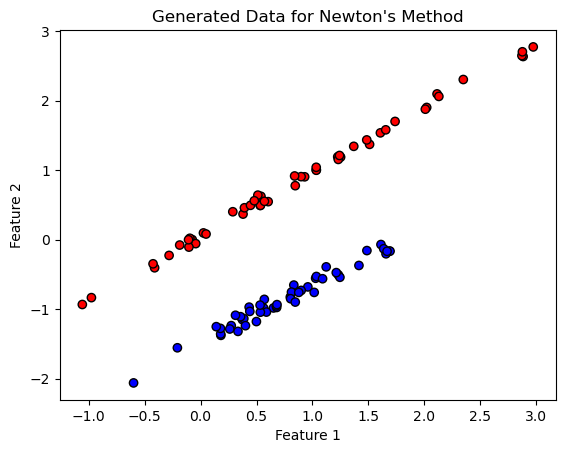

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title('Generated Data for Newton\'s Method')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    return -(1/m) * np.sum(y*np.log(h+epsilon) + (1-y)*np.log(1-h+epsilon))

In [15]:
#헤시안 행렬 계산 함수: 비용함수의 곡률을 알려주는 정보 -> 얼마나 빠르게 움직일까를 알려줌 (gradient: 방향 결정)

def compute_hessian(X, theta):
    h = sigmoid(X @ theta)
    diag = np.diag(h * (1 - h))
    return X.T @ diag @ X

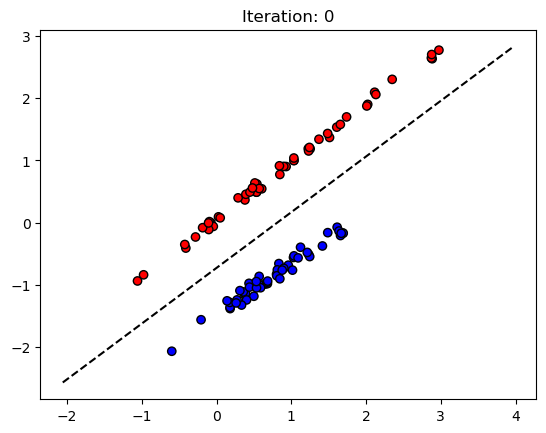

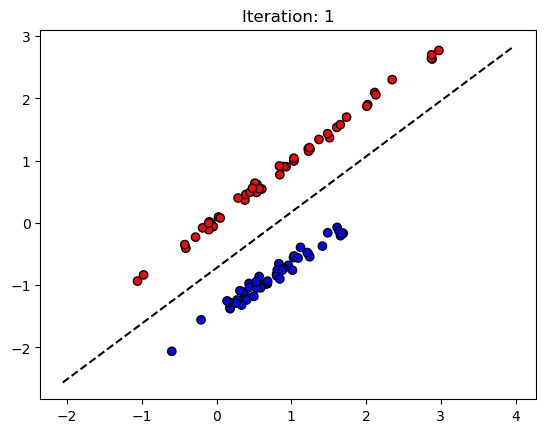

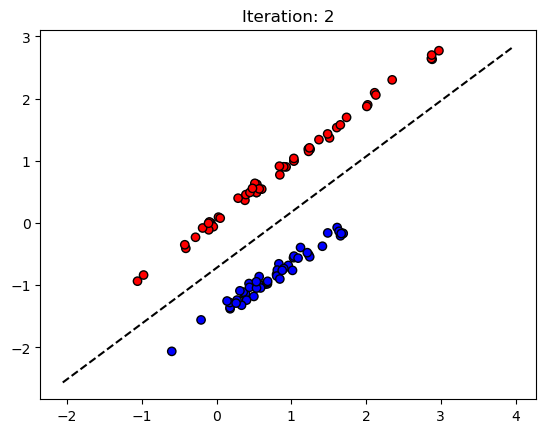

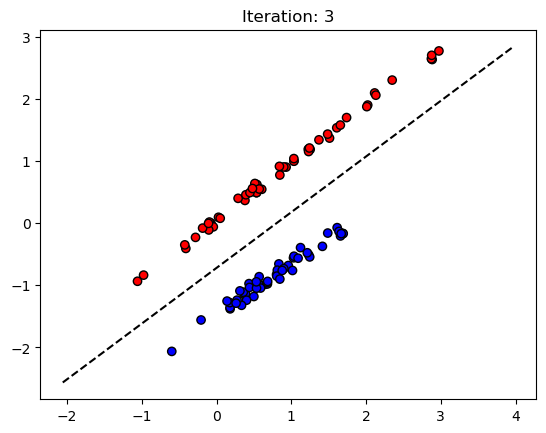

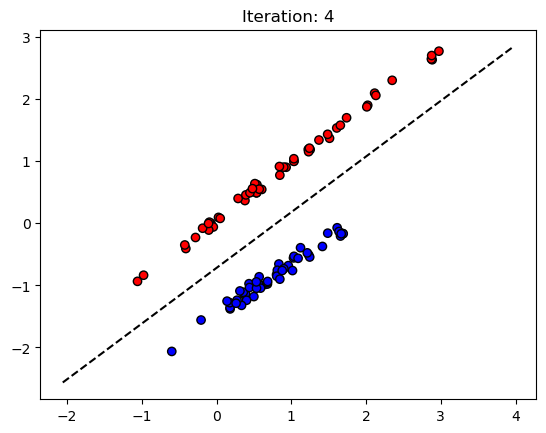

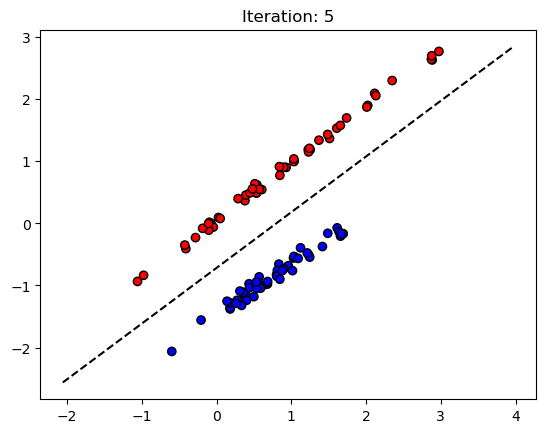

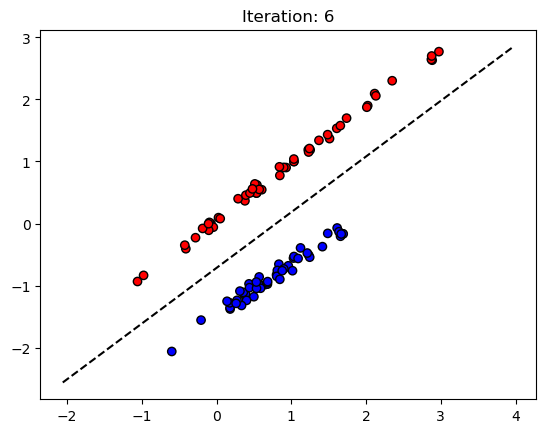

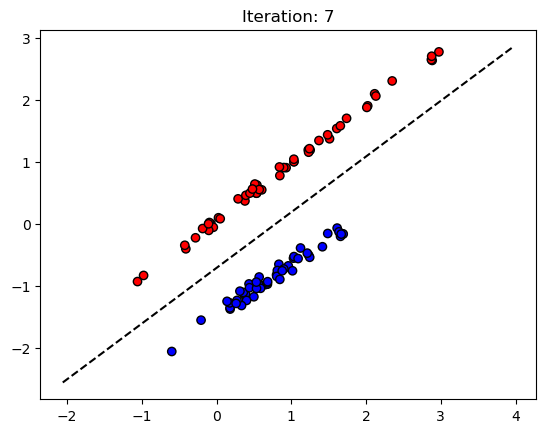

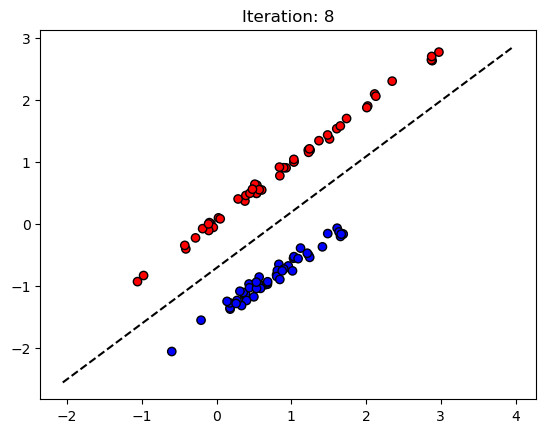

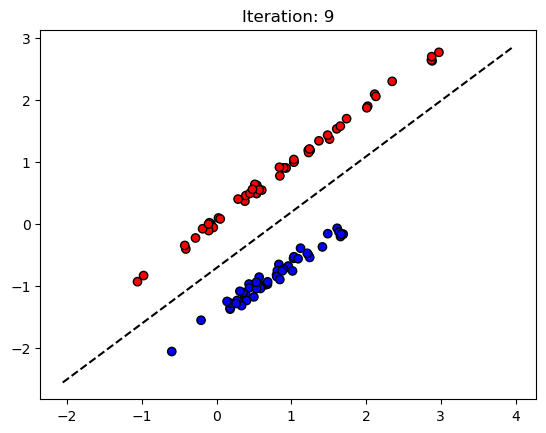

<Figure size 640x480 with 0 Axes>

In [17]:
iterations = 10
theta = np.zeros(X_bias.shape[1])
cost_history = []

x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
m = len(y)

for i in range(iterations):
    h = sigmoid(X_bias @ theta)
    gradient = X_bias.T @ (h - y)
    hessian = compute_hessian(X_bias, theta)

    # 파라미터 업데이트
    theta -= np.linalg.inv(hessian) @ gradient

    # Cost 기록
    cost = compute_cost(X_bias, y, theta)
    cost_history.append(cost)

    # 결정경계 시각화
    y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.plot(x_vals, y_vals, 'k--')
    plt.title(f'Iteration: {i}')
    plt.pause(0.5)
    plt.clf()

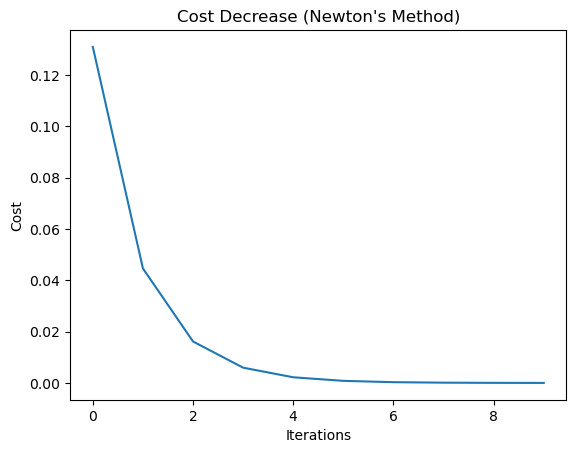

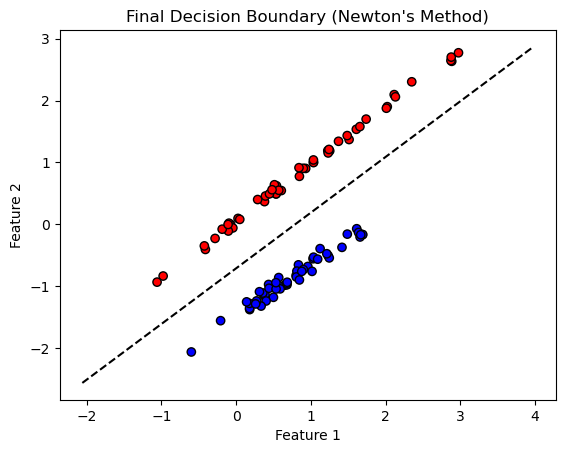

In [19]:
# Cost 그래프
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Decrease (Newton\'s Method)')
plt.show()

# 최종 결정경계 고정 시각화
y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_vals, y_vals, 'k--')
plt.title('Final Decision Boundary (Newton\'s Method)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()